# Identify hot and cold spots of high casualty risk rate or casualty location rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import geopandas as gpd
import itertools



In [2]:
lsoa_space = gpd.read_file('data/London/LSOA_2011_London_gen_MHW.shp').to_crs('EPSG:4326')
lsoa_space.rename(columns={'LSOA11CD':'lsoa'}, inplace=True)

# 提取 lsoa_space GeoDataFrame 中的 'lsoa' 列并转换为列表
lsoa_list_from_gdf = lsoa_space['lsoa'].tolist()
# len(lsoa_list_from_gdf) #4835

# lsoa_space


In [3]:
collision_all = pd.read_csv('data/dft-road-casualty-statistics-collision-last-5-years.csv')

# 使用geopandas中的points_from_xy函数创建geometry列
collision_all['geometry'] = gpd.points_from_xy(collision_all['longitude'], collision_all['latitude'], crs="EPSG:4326")
# 将DataFrame转换为GeoDataFrame
collision_all = gpd.GeoDataFrame(collision_all, geometry='geometry', crs="EPSG:4326")
collision_all.rename(columns={'lsoa_of_accident_location':'lsoa'}, inplace=True)

collision_2021 = collision_all[collision_all['accident_year'] == 2021]
collision_2022 = collision_all[collision_all['accident_year'] == 2022]
collision_2023 = collision_all[collision_all['accident_year'] == 2023]

# 使用新的 lsoa_list 对 gdf_collision 进行过滤，并选择lsoa_of_accident_location和geometry列
collision_2021 = collision_2021[collision_2021['lsoa'].isin(lsoa_list_from_gdf)]
collision_2022 = collision_2022[collision_2022['lsoa'].isin(lsoa_list_from_gdf)]
collision_2023 = collision_2023[collision_2023['lsoa'].isin(lsoa_list_from_gdf)]

collision_2023
# collision_2023.plot(markersize=0.05)


C:\Users\YU\AppData\Local\Temp\ipykernel_36296\3929937235.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_all = pd.read_csv('data/dft-road-casualty-statistics-collision-last-5-years.csv')


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa,enhanced_severity_collision,geometry
415826,2023010419171,2023,010419171,525060.0,170416.0,-0.202878,51.418974,1,3,1,...,8,2,0,0,1,1,2,E01003383,-1,POINT (-0.20288 51.41897)
415827,2023010419183,2023,010419183,535463.0,198745.0,-0.042464,51.671155,1,3,3,...,1,1,0,0,1,1,2,E01001547,-1,POINT (-0.04246 51.67116)
415828,2023010419189,2023,010419189,508702.0,177696.0,-0.435789,51.487777,1,3,2,...,1,1,0,0,1,1,2,E01002448,-1,POINT (-0.43579 51.48778)
415829,2023010419191,2023,010419191,520341.0,190175.0,-0.263972,51.597575,1,3,2,...,9,1,0,0,1,1,2,E01000129,-1,POINT (-0.26397 51.59758)
415830,2023010419192,2023,010419192,527255.0,176963.0,-0.168976,51.477324,1,3,2,...,1,1,0,0,1,1,2,E01004583,-1,POINT (-0.16898 51.47732)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503689,2023481407567,2023,481407567,531350.0,181567.0,-0.108331,51.517763,48,2,1,...,8,2,0,0,1,3,2,E01000917,5,POINT (-0.10833 51.51776)
503690,2023481409647,2023,481409647,531556.0,181647.0,-0.105334,51.518434,48,2,1,...,1,1,0,0,1,1,2,E01032740,7,POINT (-0.10533 51.51843)
503691,2023481409652,2023,481409652,533386.0,181660.0,-0.078970,51.518122,48,3,1,...,2,2,0,0,1,1,2,E01032739,3,POINT (-0.07897 51.51812)
503692,2023481409658,2023,481409658,531594.0,181423.0,-0.104870,51.516412,48,3,2,...,1,1,0,0,1,3,2,E01032740,3,POINT (-0.10487 51.51641)


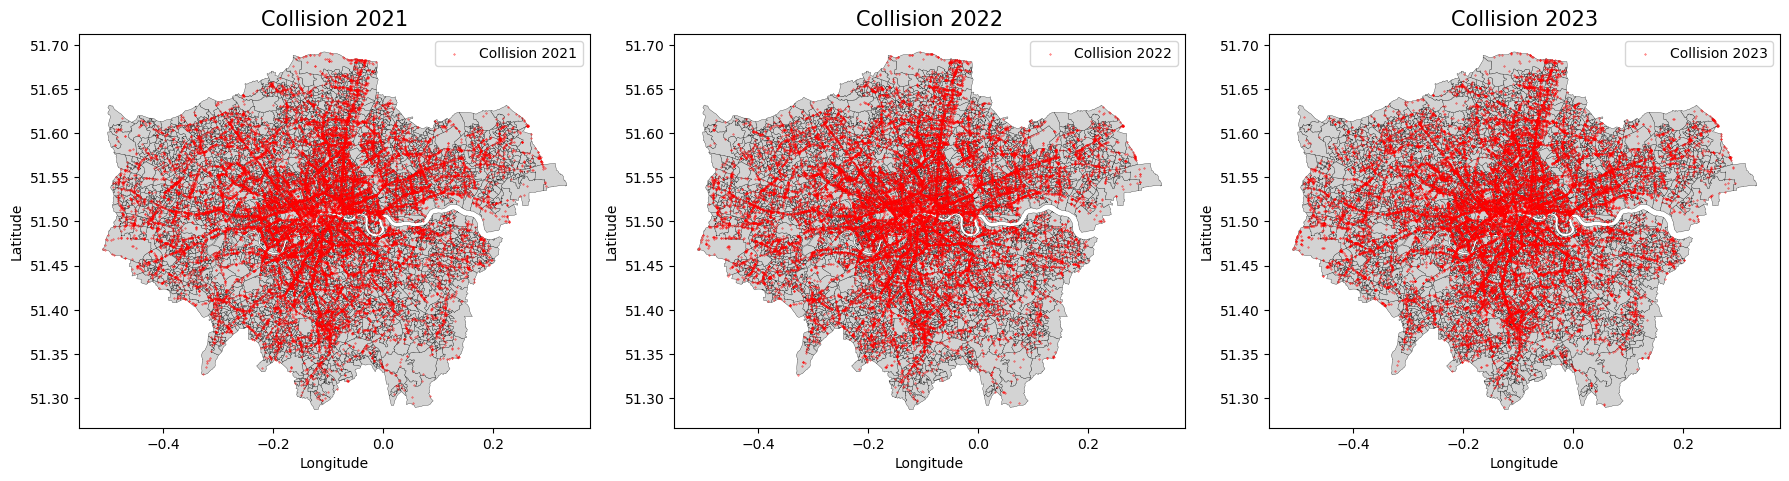

In [4]:
# 创建并列子图
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1行3列

# 设置标题列表
titles = ['Collision 2021', 'Collision 2022', 'Collision 2023']
collision_data = [collision_2021, collision_2022, collision_2023]

# 绘制每一年的事故数据
for i, ax in enumerate(axes):
    # 绘制 lsoa_space 边界图
    lsoa_space.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.2)

    # 绘制对应年份的事故点数据
    collision_data[i].plot(ax=ax, color='red', markersize=0.1, label=f'{titles[i]}')

    # 设置标题和标签
    ax.set_title(titles[i], fontsize=15)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()

# 调整布局
plt.tight_layout()
plt.show()


In [5]:
lsoa_space

,lsoa,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((-0.09729 51.52158, -0.09652 51.52027..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((-0.09679 51.52325, -0.09647 51.52282..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((-0.07323 51.51, -0.07553 51.50974, -..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,0,107.6,581,2.3,"POLYGON ((0.0824 51.49886, 0.08415 51.49803, 0..."
4831,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,0,20.4,663,3.1,"POLYGON ((0.11081 51.5098, 0.11227 51.50782, 0..."
4832,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,117,125.8,646,2.7,"POLYGON ((0.08072 51.4955, 0.08165 51.49491, 0..."
4833,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,0,32.3,591,3.1,"POLYGON ((0.10806 51.50135, 0.10664 51.50021, ..."


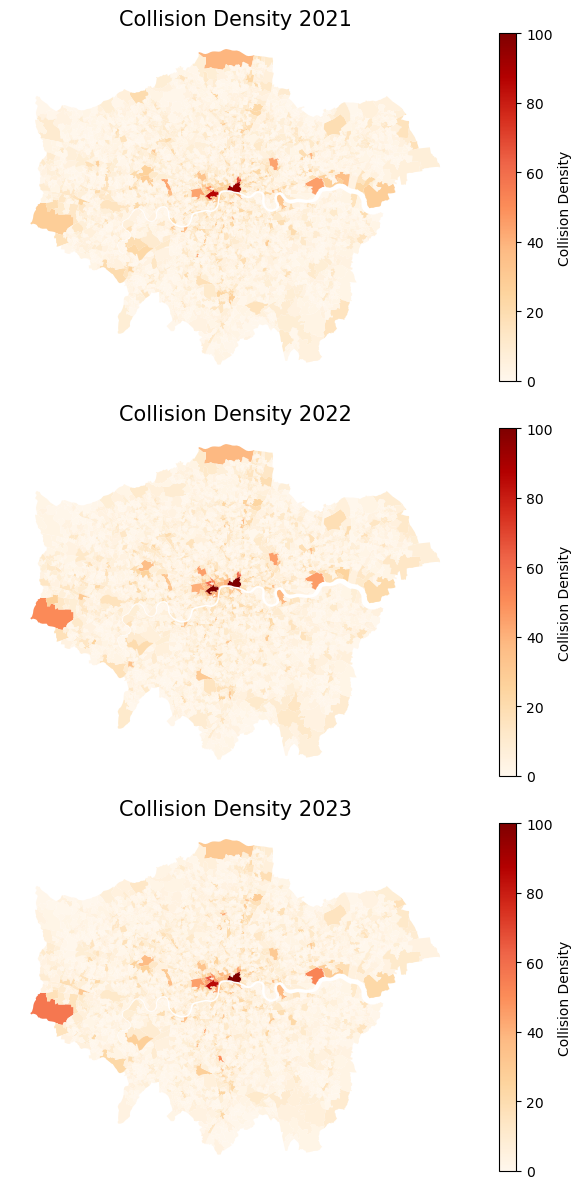

In [19]:
# 创建竖向子图
fig, axes = plt.subplots(3, 1, figsize=(8, 12))  # 3行1列

# 设置标题列表
titles = ['Collision Density 2021', 'Collision Density 2022', 'Collision Density 2023']
collision_data = [collision_2021, collision_2022, collision_2023]

range = (0, 100)

# 绘制每一年的事故密度图
for i, ax in enumerate(axes):
    # 空间连接：将事故点与 lsoa_space 区域匹配
    joined = gpd.sjoin(collision_data[i], lsoa_space, how='left', predicate='within')

    # 统计每个区域的事故点数量
    density = joined.groupby('lsoa_right').size()  # lsoa_right 是由于 sjoin 自动添加的后缀

    # 合并密度数据到 lsoa_space GeoDataFrame 中
    lsoa_space['collision_density'] = lsoa_space['lsoa'].map(density).fillna(0)

    # 绘制密度图
    lsoa_space.plot(
        column='collision_density', ax=ax, cmap='OrRd', legend=True,
        legend_kwds={'label': "Collision Density"}, 
        vmin=range[0], vmax=range[1],  # 设置固定范围
        edgecolor='none'
        )

    # 设置标题和标签
    ax.set_title(titles[i], fontsize=15)
    ax.axis('off')  # 隐藏坐标轴（如果不需要显示）

# 调整布局
plt.tight_layout()
plt.show()


In [7]:
count2021 = collision_2021['lsoa'].value_counts()
count2022 = collision_2022['lsoa'].value_counts()
count2023 = collision_2023['lsoa'].value_counts()
count2023

unique_selected_2021 = collision_2021[['lsoa']].drop_duplicates(subset='lsoa')
unique_selected_2021['count'] = unique_selected_2021['lsoa'].map(count2021)
unique_selected_2021.rename(columns={'lsoa':'lsoa'}, inplace=True)

unique_selected_2022 = collision_2022[['lsoa']].drop_duplicates(subset='lsoa')
unique_selected_2022['count'] = unique_selected_2022['lsoa'].map(count2022)
unique_selected_2022

unique_selected_2023 = collision_2023[['lsoa']].drop_duplicates(subset='lsoa')
unique_selected_2023['count'] = unique_selected_2023['lsoa'].map(count2023)

unique_selected_2022 # 4263 rows × 2 columns
# unique_selected_2022


,lsoa,count
309822,E01001883,13
309823,E01033745,16
309824,E01000378,16
309825,E01001529,7
309826,E01003673,3
...,...,...
399296,E01032740,41
399297,E01000005,11
399302,E01032739,110
399315,E01000002,8


In [8]:
information = pd.read_csv("data/lsoa-reference-data.csv")
information = information[information['Census Year'] == 2021]
information = information.rename(columns={'LSOA Code': 'lsoa'})
information

,Census Year,lsoa,Road Length,Population,IMD Decile
4835,2021,E01000001,2855.474246,1475,9
4836,2021,E01000002,4288.325821,1384,10
4837,2021,E01000003,1073.346027,1616,5
4838,2021,E01000005,4528.304022,1103,3
4839,2021,E01000006,2703.273461,1845,5
...,...,...,...,...,...
9824,2021,E01035718,17495.817160,2568,8
9825,2021,E01035719,1919.390834,1272,6
9826,2021,E01035720,2317.296223,1217,6
9827,2021,E01035721,5156.255294,2328,4


In [9]:
# 创建一个字典来存储每年的结果
results = {}

# 定义年份和对应的 unique_selected 数据
years = [2021, 2022, 2023]
unique_selected_data = [unique_selected_2021, unique_selected_2022, unique_selected_2023]

# 循环遍历每一年
for i, year in enumerate(years):
    # 合并数据
    res = pd.merge(lsoa_space[['lsoa', 'geometry']], unique_selected_data[i], on='lsoa', how='left')
    res = pd.merge(res, information, on='lsoa', how='left')
    
    # 计算指标
    res['casualty_people_rate'] = res['count'] / res['Population'] * 1000
    res['casualty_length_rate'] = res['count'] / res['Road Length'] * 1000
    
    # 填充缺失值
    res['casualty_people_rate'] = res['casualty_people_rate'].fillna(0)
    res['casualty_length_rate'] = res['casualty_length_rate'].fillna(0)
    
    res = gpd.GeoDataFrame(res, geometry='geometry')

    # 将结果存储在字典中
    results[year] = res

# 访问每年的数据，例如：
res2021 = results[2021]
res2022 = results[2022]
res2023 = results[2023]

res2023

,lsoa,geometry,count,Census Year,Road Length,Population,IMD Decile,casualty_people_rate,casualty_length_rate
0,E01000001,"POLYGON ((-0.09729 51.52158, -0.09652 51.52027...",7.0,2021.0,2855.474246,1475.0,9.0,4.745763,2.451432
1,E01000002,"POLYGON ((-0.08813 51.51941, -0.08929 51.51752...",2.0,2021.0,4288.325821,1384.0,10.0,1.445087,0.466382
2,E01000003,"POLYGON ((-0.09679 51.52325, -0.09647 51.52282...",NaN,2021.0,1073.346027,1616.0,5.0,0.000000,0.000000
3,E01000005,"POLYGON ((-0.07323 51.51, -0.07553 51.50974, -...",16.0,2021.0,4528.304022,1103.0,3.0,14.505893,3.533332
4,E01000006,"POLYGON ((0.09115 51.53909, 0.09326 51.53787, ...",1.0,2021.0,2703.273461,1845.0,5.0,0.542005,0.369922
...,...,...,...,...,...,...,...,...,...
4830,E01033742,"POLYGON ((0.0824 51.49886, 0.08415 51.49803, 0...",NaN,2021.0,840.206733,1339.0,7.0,0.000000,0.000000
4831,E01033743,"POLYGON ((0.11081 51.5098, 0.11227 51.50782, 0...",NaN,2021.0,5520.035242,1941.0,5.0,0.000000,0.000000
4832,E01033744,"POLYGON ((0.08072 51.4955, 0.08165 51.49491, 0...",NaN,2021.0,3063.978880,1803.0,3.0,0.000000,0.000000
4833,E01033745,"POLYGON ((0.10806 51.50135, 0.10664 51.50021, ...",2.0,2021.0,9274.556671,1783.0,4.0,1.121705,0.215644


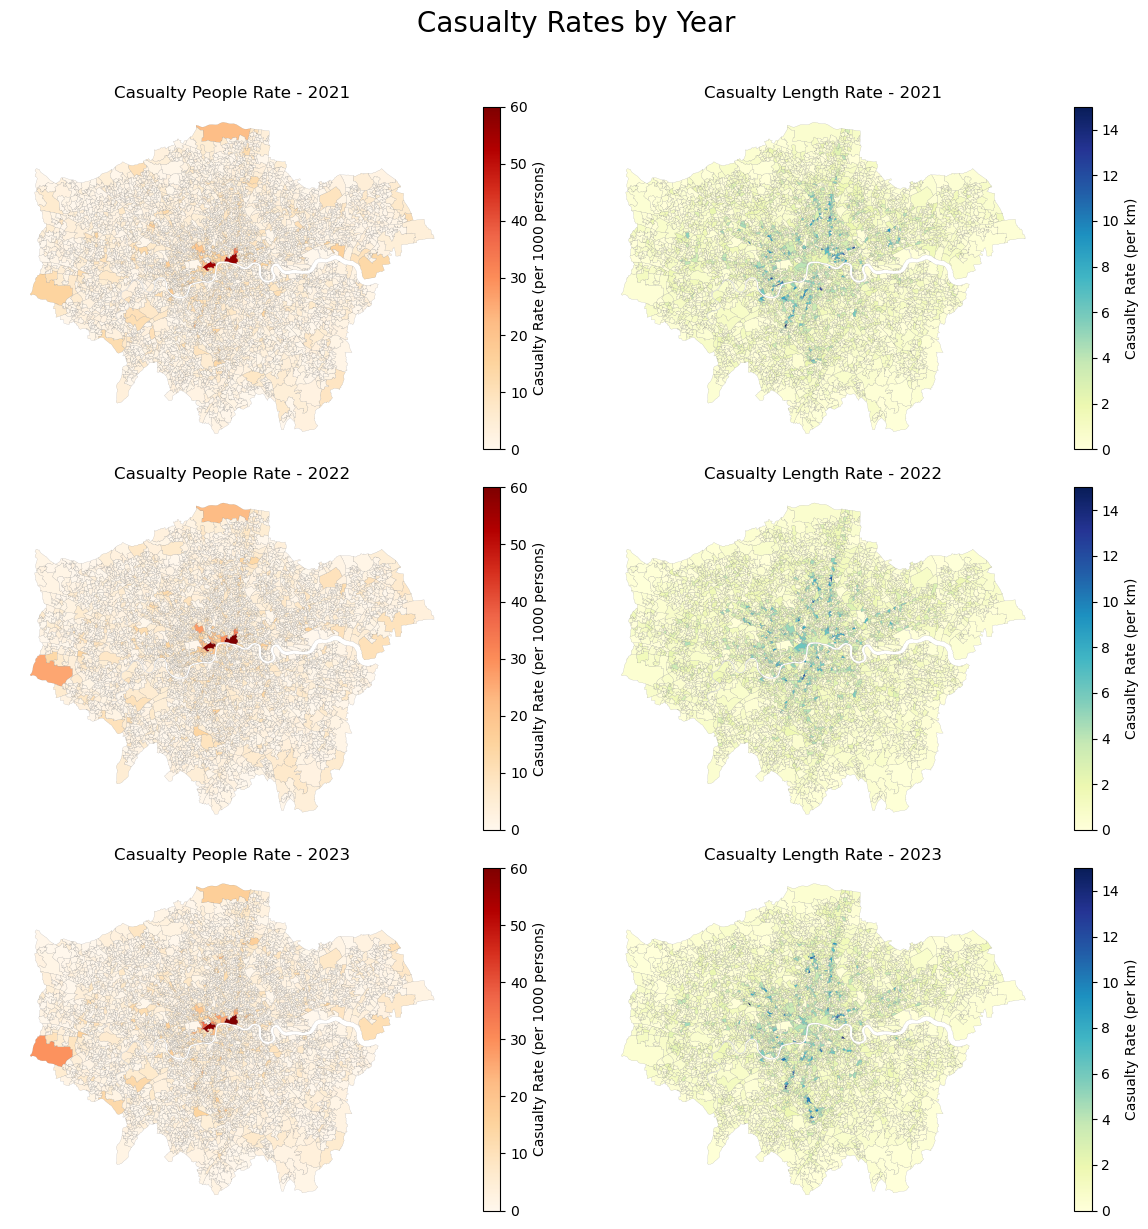

In [20]:
# 创建一个 3 行 2 列的子图布局
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle("Casualty Rates by Year", fontsize=20, y=1.02)  # 总标题

# 定义标题
titles = ['2021', '2022', '2023']
people_rate_range = (0, 60)   # 固定范围：0-80
length_rate_range = (0, 15)   # 固定范围：0-18

# 遍历每年的结果，绘制两种指标的地图
for i, year in enumerate([2021, 2022, 2023]):
    # 绘制 casualty_people_rate
    results[year].plot(column='casualty_people_rate', ax=axes[i, 0], cmap='OrRd',
                    legend=True, edgecolor='grey', linewidth=0.1,
                    legend_kwds={'label': "Casualty Rate (per 1000 persons)"},
                    vmin=people_rate_range[0], vmax=people_rate_range[1])  # 设置固定范围
    
    axes[i, 0].set_title(f'Casualty People Rate - {year}')
    axes[i, 0].axis('off')  # 隐藏坐标轴
    
    # 绘制 casualty_length_rate
    results[year].plot(column='casualty_length_rate', ax=axes[i, 1], cmap='YlGnBu',
                    legend=True, edgecolor='grey', linewidth=0.1,
                    legend_kwds={'label': "Casualty Rate (per km)"},
                    vmin=length_rate_range[0], vmax=length_rate_range[1])
    
    axes[i, 1].set_title(f'Casualty Length Rate - {year}')
    axes[i, 1].axis('off')  # 隐藏坐标轴

# 调整布局并显示图形
plt.tight_layout()
plt.show()


> We can find some central lsoa places are high in casualty people rate but low in casualty length rate, cos those roads are long.

<Axes: >

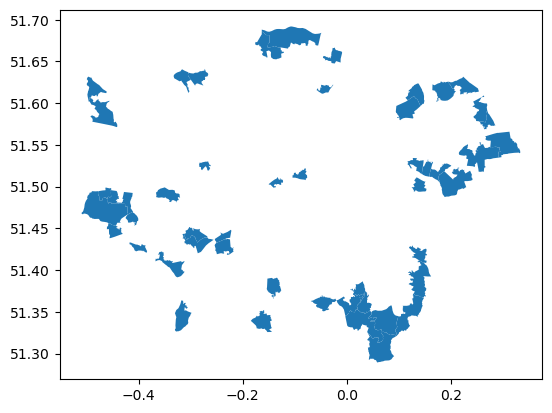

In [29]:
res2023.sort_values(by='Road Length', ascending=False).head(50).plot()